In [1]:
# UFRJ/COPPE/PEE - Processamento de Sinais Aleatórios - 2019.3
# Professor: Luiz Wagner Pereira Biscainho
# Exercicio C1 - Processo Aleatório Autoregressivo
# Aluna: Maria Gabriella Andrade Felgas

import numpy as np
import matplotlib.pyplot as plt

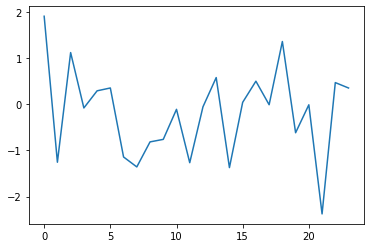

In [2]:
# Definindo os parâmetros
a = np.asarray([1, 0, 0.81])
b = 1

# Definindo o numero de amostras a serem geradas 
num_samples = 24

# Considerando que o sinal é causal
# Ou seja, inicializando as amostras anteriores
# com zero
x1 = 0
x2 = 0

# Inicializando o vetor de amostras
x = np.zeros((num_samples))

# Inicializando o ruído branco
mean = 0
std = 1
samples = np.random.normal(mean, std, size=num_samples)
plt.plot(samples)
plt.show()

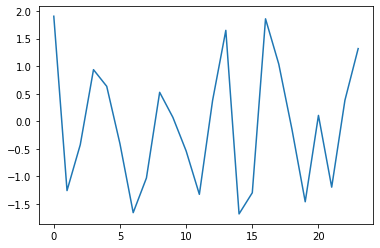

In [3]:
# Gerando as amostras do sinal

for i in range(num_samples):    
    x[i] = - (a[1] * x1) - (a[2] * x2) + (b * samples[i])
    x2 = x1
    x1 = x[i]
    
plt.plot(x)
plt.show()

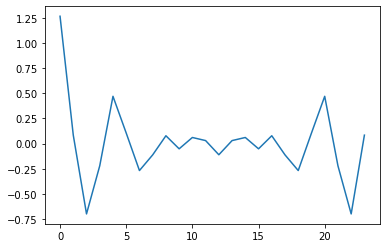

In [4]:
# Para o cálculo de autocorrelação amostral
# é preciso calcular a correlação de cada ponto
# com todos os outros considerando diferentes intervalos

r_hat = np.zeros((num_samples))

for k in range(num_samples):
    for n in range(num_samples):
        # segundo a definição do livro (ex. C3.2)
        r_hat[k] += (x[n] * np.conj(x[n - k]))
        
    r_hat[k] /= num_samples

plt.plot(r_hat)
plt.show()

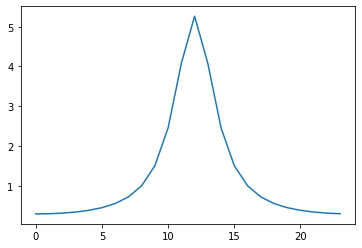

In [5]:
# A partir da equação 3.88, pode-se
# considerar Px(z) = Pv(z)*|H(z)|^2
# Isso vai ser utilizado no cálculo
# da sequência de autocorrelação real

i = 0
P_x = np.zeros((num_samples))

for w in np.arange(0, np.pi, np.pi / num_samples):
    P_x[i] = (b ** 2) / (1 + (a[1] + a[1] * a[2]) * 2 * np.cos(w) + a[2] * 2 * np.cos(2 * w) + a[1] + a[2])
    i += 1

plt.plot(P_x)
plt.show()

C:\Users\gabri\Anaconda3\envs\cpe764\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


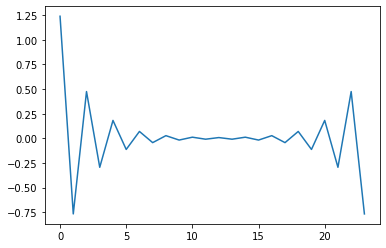

In [6]:
r = np.fft.ifft(P_x, num_samples)

plt.plot(r)
plt.show()

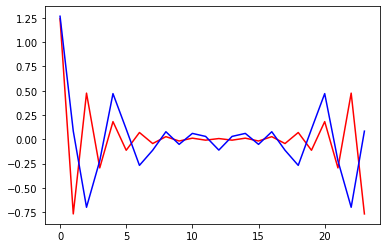

In [7]:
# Comparando r com r_hat

plt.plot(r, 'r') 
plt.plot(r_hat, 'b')
plt.show()

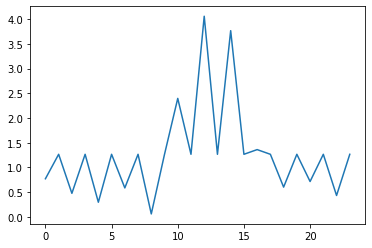

In [8]:
Px_hat1 = np.fft.fft(r_hat, 2 * num_samples)
Px_hat1 = Px_hat1[num_samples:]

plt.plot(Px_hat1)
plt.show()

In [9]:
# Considerando as equações Yule-Walker
# é possível estimar os valores de a(1),
# a(2) e b(0) a partir de r_hat

delta = np.zeros((a.shape))
delta[0] = b

R_hat = [[r_hat[0], r_hat[-1], r_hat[-2]], [r_hat[1], r_hat[0], r_hat[-1]],[r_hat[2], r_hat[1], r_hat[0]]]

# Estimando os a(k)s de acordo com 
# as equações 3.120 e 3.121
a_hat = np.matmul(np.linalg.inv(R_hat), delta)
print(a_hat)

[ 1.15513002 -0.11951145  0.64579498]


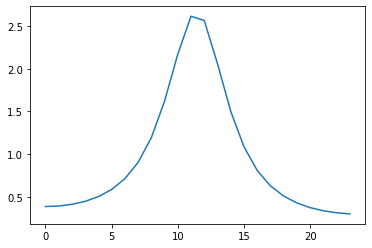

In [10]:
# Estimando o espectro de potência
# a partir das estimativas de a(k) e b

i = 0
Px_hat2 = np.zeros((num_samples))

for w in np.arange(0, np.pi, np.pi / num_samples):
    Px_hat2[i] = (b ** 2) / (a_hat[0] + (a_hat[1] + a_hat[1] * a_hat[2]) * 2 * np.cos(w) + a_hat[2] * 2 * np.cos(2 * w) + a_hat[1] + a_hat[2])
    i += 1
    
plt.plot(Px_hat2)
plt.show()

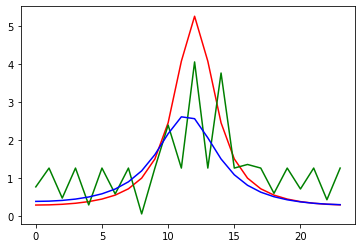

In [11]:
# Comparando r com r_hat

plt.plot(P_x, 'r') 
plt.plot(Px_hat1,'g') 
plt.plot(Px_hat2, 'b')
plt.show()